In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt#导入库及所需的包
from datetime import datetime
plt.rc('font', family='SimHei', size=18)# 显示中文标签
plt.style.use ('ggplot')#设定绘图风格

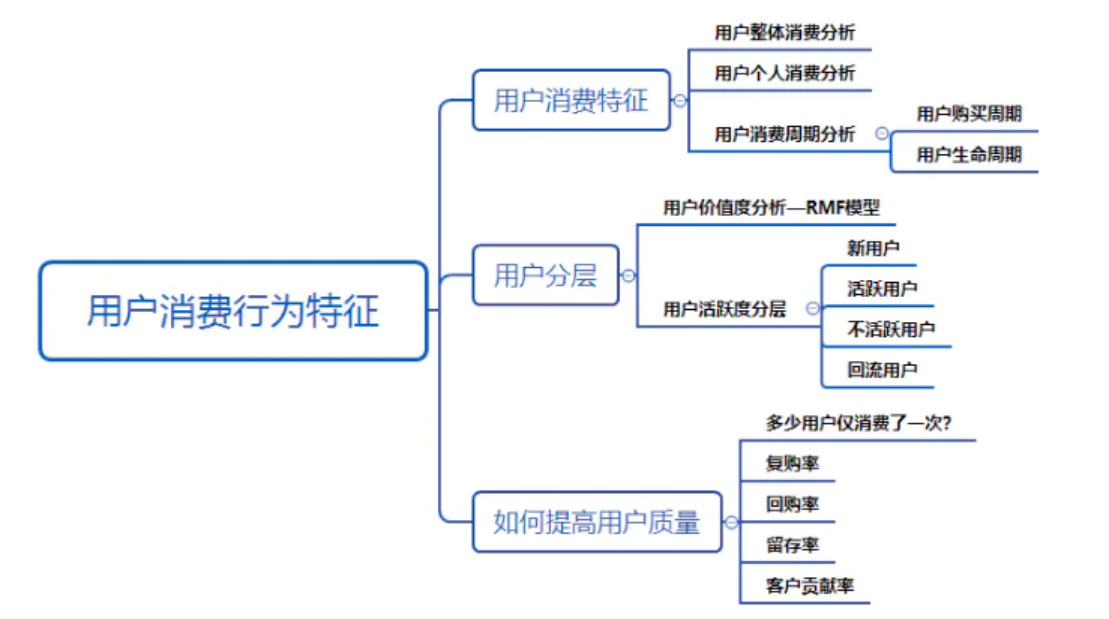

In [109]:
df = pd.read_excel('cuscapi.xls')
df.head()

,user_id,order_dt,order_products,order_amount
0,vs30033073,2020-01-17,1,20
1,vs30026748,2019-12-04,1,20
2,vs10000716,2019-07-05,1,20
3,vs30032785,2019-08-21,2,0
4,vs10000716,2019-10-24,1,20


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013 entries, 0 to 2012
Data columns (total 4 columns):
user_id           2013 non-null object
order_dt          2013 non-null datetime64[ns]
order_products    2013 non-null int64
order_amount      2013 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 63.0+ KB


# 描述性统计

In [94]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe()

,order_products,order_amount
count,2013.00,2013.00
mean,1.47,22.90
std,0.91,94.94
min,1.00,0.00
25%,1.00,20.00
50%,1.00,20.00
75%,2.00,20.00
max,12.00,2650.00


从数据的描述性统计中可以看出，会员用户每次消费平均购买1.47个商品，每次平均消费22.90元。  
购买数量和消费金额的均值皆略大于中位数，说明购买数量和消费金额呈右偏分布,均存在极大值。符合消费类数据的长尾分布状况。

In [112]:
# df['order_dt'] = df['order_dt'].dt.date
df['month'] = df['order_dt'].astype('datetime64[M]')

In [113]:
df = df.sort_values('order_dt').reset_index(drop = True)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013 entries, 0 to 2012
Data columns (total 5 columns):
user_id           2013 non-null object
order_dt          2013 non-null datetime64[ns]
order_products    2013 non-null int64
order_amount      2013 non-null int64
month             2013 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 78.7+ KB


# 用户整体消费趋势分析

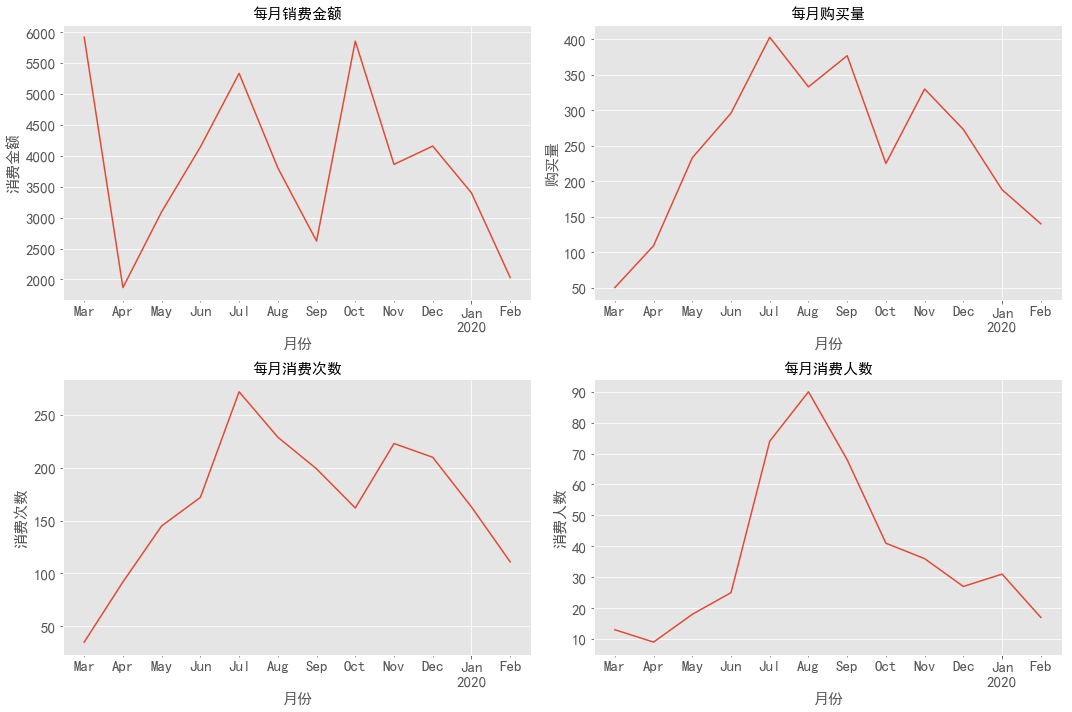

In [6]:
# 设置图的大小，添加子图
plt.figure(figsize=(15,10))
plt.subplot(221)
df.groupby('month')['order_amount'].sum().plot(fontsize=15) 
plt.xlabel('月份',fontsize=15)
plt.ylabel('消费金额',fontsize=15)
plt.title('每月销费金额',fontsize=15) 
 
plt.subplot(222)
df.groupby('month')['order_products'].sum().plot(fontsize=15)
plt.xlabel('月份',fontsize=15)
plt.ylabel('购买量',fontsize=15)
plt.title('每月购买量',fontsize=15)

plt.subplot(223)
df.groupby('month')['order_dt'].count().plot(fontsize=15)
plt.xlabel('月份',fontsize=15)
plt.ylabel('消费次数',fontsize=15)
plt.title('每月消费次数',fontsize=15) 

plt.subplot(224)
df.groupby('month')['user_id'].nunique().plot(fontsize=15)
plt.xlabel('月份',fontsize=15)
plt.ylabel('消费人数',fontsize=15)
plt.title('每月消费人数',fontsize=15)
plt.tight_layout() # 设置子图的间距
plt.show()

不同月份的消费金额波动较大。三月份到七月份的购买量和消费次数随着消费人数的增加而增加，进入八月份以后消费人数开始减少，说明出现了部分用户流失的情况，随之而来的是消费次数和购买量出现了明显下降。

# 用户个人消费分析

In [8]:
## 以用户为单位进行分组  对用户分组，得到时长一年内用户个体的消费数据描述性统计
group_user=df.groupby('user_id').sum()
group_user.describe()

,order_products,order_amount
count,247.00,247.00
mean,11.97,186.59
std,36.70,641.12
min,1.00,0.00
25%,2.00,0.00
50%,2.00,0.00
75%,3.00,66.00
max,277.00,5704.00


用户平均购买约12个商品，最多的购买了277个商品。会员用户平均消费金额约为187元，标准差为641，中位数在0，结合分位数和最大值看，属于正偏分布，存在小部分会员购买大量商品的高消费情况。

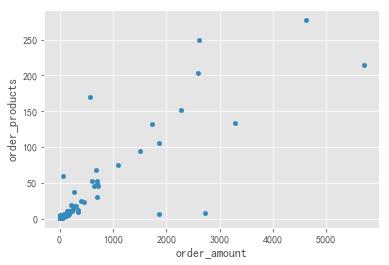

In [10]:
## 画出消费次数和消费金额的散点图
group_user.plot.scatter(x='order_amount',y='order_products')
plt.show()

从用户消费金额和消费次数的散点图，可以看到消费金额和消费次数不完全呈线性关系，极值较多，用户的消费规律性不强。

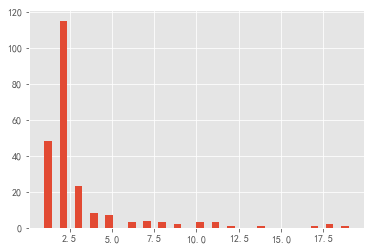

In [28]:
group_user.query('order_products<20').order_products.hist(bins=40)

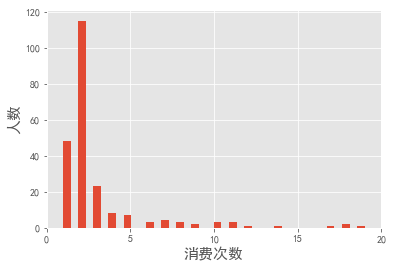

In [30]:
# 画出用户一年内消费次数的分布图（去除掉个别极值的影响，可以更好的看出分布状况）（筛选出消费次数小于20 的用户）
group_user.query('order_products<20').order_products.hist(bins=40)
plt.xlabel('消费次数',fontsize=15)
plt.ylabel('人数',fontsize=15)

plt.xticks(np.arange(0,21,5),['0','5','10','15','20'])
plt.show()

从消费次数的右偏分布中可以看出，大部分用户一年内的消费次数在1次到5次之间，少部分用户在10次左右。

画出用户一年内消费次数的分布图（去除掉个别极值的影响，可以更好的看出分布状况）（筛选出消费金额小于200 的用户）

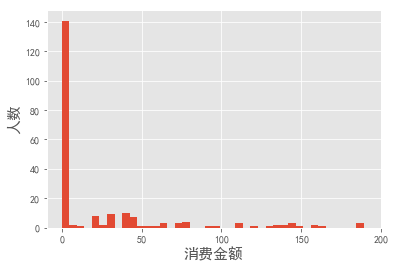

In [36]:
## 对消费金额进行筛选
## 画出一年内用户消费金额的分布直方图
group_user.query('order_amount<200').order_amount.hist(bins=40)
plt.xlabel('消费金额',fontsize=15)
plt.ylabel('人数',fontsize=15)
plt.xticks(np.arange(0,201,50),[0,50,100,150,200])
plt.show()

从消费次数的右偏分布中可以看出大部分人的消费金额较低，尽管均值在186元左右，但这是由于出现了极个别高消费用户整体提高了平均水平。

# 用户消费周期分析

+ ## 用户生命周期分析

In [98]:
#各用户首次、最后一次消费时间间隔
order_dt_min=df.groupby('user_id').order_dt.min()
order_dt_max=df.groupby('user_id').order_dt.max()
life_time=(order_dt_max-order_dt_min).reset_index()
life_time.head()

,user_id,order_dt
0,vs10000005,273 days
1,vs10000621,351 days
2,vs10000627,1 days
3,vs10000716,238 days
4,vs10000743,0 days


In [38]:
life_time.describe()

,order_dt
count,247
mean,32 days 03:59:01.700404
std,73 days 19:15:10.251372
min,0 days 00:00:00
25%,0 days 00:00:00
50%,1 days 00:00:00
75%,13 days 00:00:00
max,351 days 00:00:00


由描述可知，所有用户的平均生命周期是32天，中位数是1天，即存在50%的客户首次消费即最后一次消费。 最大值351天，即本数据集的总天数，说明存在从开始到最后都消费的高质量用户。

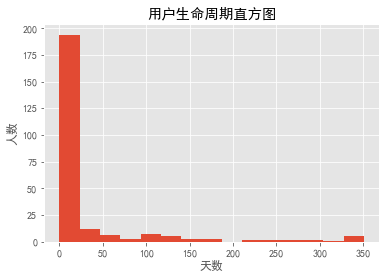

In [99]:
((order_dt_max-order_dt_min)/np.timedelta64(1,'D')).hist(bins=15)
plt.title('用户生命周期直方图')
plt.xlabel('天数')
plt.ylabel('人数')
plt.show()

## 消费两次以上的用户生命周期##

Text(0,0.5,'人数')

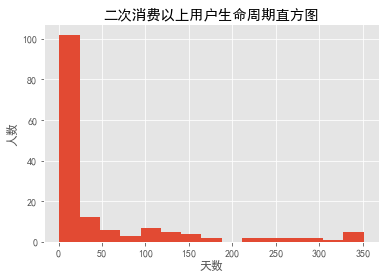

In [42]:
life_time['life_time']=life_time.order_dt/np.timedelta64(1,'D')
life_time_twice = life_time[life_time.life_time>0]
life_time_twice.life_time.hist(bins=15)#排除仅消费一次的客户
plt.title('二次消费以上用户生命周期直方图')
plt.xlabel('天数')
plt.ylabel('人数')

In [43]:
life_time_twice.describe()

,order_dt,life_time
count,155,155.00
mean,51 days 06:11:36.774193,51.26
std,87 days 20:08:14.165471,87.84
min,1 days 00:00:00,1.00
25%,2 days 00:00:00,2.00
50%,7 days 00:00:00,7.00
75%,53 days 12:00:00,53.50
max,351 days 00:00:00,351.00


二次消费以上用户生命周期为51天，略高于总体。从策略上看，用户首次消费后应该引导其再次消费。

+ ## 用户购买周期分析

In [117]:
df_diff = df.groupby('user_id').apply(lambda x:x['order_dt']-x['order_dt'].shift())
# df.head()

In [118]:
df_diff.describe()

count                       1766
mean      4 days 12:03:31.836919
std      14 days 00:39:23.884498
min              0 days 00:00:00
25%              0 days 19:31:16
50%              1 days 10:21:03
75%       3 days 13:36:15.500000
max            230 days 03:46:00
Name: order_dt, dtype: object

可知用户的平均消费间隔时间是4.5天。想要召回用户，在4.5天左右的消费间隔是比较好的。

# 用户分层

+ ## 用户价值度分析--RFM模型

按用户价值分层，采用RFM模型对用户价值指数（衡量历史到当前用户贡献的收益）进行计算，其中   
最近一次消费-R：客户最近一次交易时间的间隔。R值越大，表示客户交易发生的日期越久，反之则交易发生的日期越近。   
消费频率 
-F：客户在最近一段时间内交易的次数。F值越大，表示客户交易越频繁，反之则表示客户交易不够活跃。    
消费金额-M：客户在最近一段时间内交易的金额。M值越大，表示客户价值越高，反之则表示客户价值越低。 根据上述三个维度，对客户做细分.

In [119]:
user_rfm=df.pivot_table(index='user_id',values=['order_dt','order_products','order_amount'],aggfunc={'order_dt':'max','order_products':'count','order_amount':'sum'})
user_rfm.head()

,order_amount,order_dt,order_products
user_id,,,
vs10000005,189,2019-12-27 14:42:48,6
vs10000621,5704,2020-02-28 00:00:00,169
vs10000627,0,2019-07-23 00:00:00,2
vs10000716,2616,2020-02-28 00:00:00,131
vs10000743,20,2019-03-15 00:00:00,1


In [120]:
user_rfm['period']=(user_rfm.order_dt.max()-user_rfm.order_dt)/np.timedelta64(1,'D')
user_rfm=user_rfm.rename(columns={'period':'R','order_products':'F','order_amount':'M'})
user_rfm.head()

,M,order_dt,F,R
user_id,,,,
vs10000005,189,2019-12-27 14:42:48,6,63.15
vs10000621,5704,2020-02-28 00:00:00,169,0.76
vs10000627,0,2019-07-23 00:00:00,2,220.76
vs10000716,2616,2020-02-28 00:00:00,131,0.76
vs10000743,20,2019-03-15 00:00:00,1,350.76


In [121]:
#定义分层函数
def rfm_func(x):
    level=x.apply(lambda x:'1' if x>=0 else '0')
    label=level.R+level.F+level.M
    d={'111':'高价值客户','011':'重点保持客户',
       '101':'重点发展客户','001':'重点挽留客户',
      '110':'一般价值客户','010':'一般保持客户',
     '100':'一般发展客户','000':'潜在客户'}
    result=d[label]
    return result
user_rfm['label']=user_rfm[['R','F','M']].apply(lambda x:x-x.mean()).apply(rfm_func,axis=1)
user_rfm.head()

,M,order_dt,F,R,label
user_id,,,,,
vs10000005,189,2019-12-27 14:42:48,6,63.15,重点挽留客户
vs10000621,5704,2020-02-28 00:00:00,169,0.76,重点保持客户
vs10000627,0,2019-07-23 00:00:00,2,220.76,一般发展客户
vs10000716,2616,2020-02-28 00:00:00,131,0.76,重点保持客户
vs10000743,20,2019-03-15 00:00:00,1,350.76,一般发展客户


In [122]:
user_rfm.groupby('label').count()

,M,order_dt,F,R
label,,,,
一般保持客户,3,3,3,3
一般发展客户,144,144,144,144
潜在客户,65,65,65,65
重点保持客户,24,24,24,24
重点发展客户,2,2,2,2
重点挽留客户,2,2,2,2
高价值客户,7,7,7,7


In [123]:
user_rfm.groupby('label').sum()

,M,F,R
label,,,
一般保持客户,352,34,100.29
一般发展客户,2653,268,28561.69
潜在客户,1723,129,6719.30
重点保持客户,32494,1416,860.40
重点发展客户,2091,5,576.53
重点挽留客户,2919,9,165.91
高价值客户,3856,152,1434.35


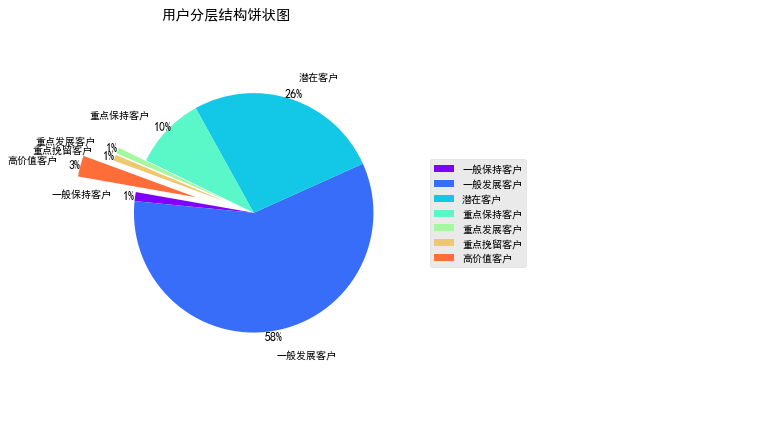

In [124]:
from matplotlib import font_manager as fm #字体管理器
from matplotlib import cm#
proptease = fm.FontProperties()
proptease.set_size('medium')

labelindex =user_rfm.groupby('label').count().index
labelvalues =user_rfm.groupby('label')['M'].count().tolist()
s = pd.Series(labelvalues, index=labelindex )
labels = s.index
sizes = s.values

explode = (0,0,0,0,0.1,0.1,0.2)  # only "explode" the 1st slice
fig, axes = plt.subplots(1,2,figsize=(10,6))
ax1,ax2 = axes.ravel()#结合ravel()函数列出所有子图

colors = cm.rainbow(np.arange(len(sizes))/len(sizes))# # 随机生成颜色
# patches：饼片。texts：分类标签的文本列表。autotexts：百分比部分的文本列表
patches, texts, autotexts = ax1.pie(sizes, labels=labels, autopct='%1.0f%%',explode=explode,
shadow=False, startangle=170, colors=colors, labeldistance=1.2,pctdistance=1.05, radius=0.4)
ax1.axis('equal')#将饼图显示为正圆形
plt.setp(texts, fontproperties=proptease)

# 设置百分比文本样式
for i in autotexts:
    i.set_size('large')
ax1.set_title('用户分层结构饼状图', loc='center')
ax2.axis('off')#关闭所有坐标轴线、刻度标记和标签
ax2.legend(patches, labels, loc='center left',fontsize=10)
plt.tight_layout()#tight_layout会自动调整子图参数，使之填充整个图像区域

从RFM模型的结果来看，该健身平台的精细化运营并没有做的非常合适。重要价值用户和重要保持用户、重要发展用户的占比都很低。该健身平台应该主动联系用户来调查清楚哪方面出了问题，并注重对用户进行精细化运营，不断将用户转化为重要价值用户。

## 用户活跃度分层

In [126]:
pivoted_amount=df.pivot_table(index='user_id',columns='month',values='order_amount',aggfunc='mean').fillna(0)
columns_month=df.month.dt.date.sort_values().unique()
pivoted_amount.columns=columns_month
pivoted_purchase=pivoted_amount.applymap(lambda x:1 if x>1 else 0)
pivoted_purchase.head()

,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01,2020-01-01,2020-02-01
user_id,,,,,,,,,,,,
vs10000005,1,0,1,0,0,0,0,0,0,1,0,0
vs10000621,1,1,1,1,1,1,1,1,1,1,1,1
vs10000627,0,0,0,0,0,0,0,0,0,0,0,0
vs10000716,0,0,0,0,1,1,1,1,1,1,1,1
vs10000743,1,0,0,0,0,0,0,0,0,0,0,0


In [153]:
#按照用户的消费行为，简单划分成几个维度：新用户、活跃用户、不活跃用户、回流用户。
#新用户(new)的定义是第一次消费。
#活跃用户(active)即老客，在某一个时间窗口内有过消费。
#不活跃用户(unactive)则是时间窗口内没有消费过的老客。
#回流用户(return)是在上一个窗口中没有消费，而在当前时间窗口内有过消费。
#以上的时间窗口都是按月统计。
def active_status(data):
    status = []
    for i in range(12):
        #若本月没有消费
        if data[i] == 0:
            if len(status) > 0:
                if status[i-1] == 'unreg': #未注册
                    status.append('unreg')
                else:
                    status.append('unactive')
            else:
                status.append('unreg')
          #若本月有消费      
        else:
            if len(status) == 0:
                status.append('new')
            else:
                if status[i-1] == 'unactive':
                    status.append('return')
                elif status[i-1] == 'unreg':
                    status.append('new')
                else:
                    status.append('active')
    return pd.Series(status)
pivoted_purchase_status = pivoted_purchase.apply(active_status,axis=1)
pivoted_purchase_status.columns=columns_month
pivoted_purchase_status.head()

,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01,2020-01-01,2020-02-01
user_id,,,,,,,,,,,,
vs10000005,new,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive
vs10000621,new,active,active,active,active,active,active,active,active,active,active,active
vs10000627,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg
vs10000716,unreg,unreg,unreg,unreg,new,active,active,active,active,active,active,active
vs10000743,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive


In [154]:
pivoted_status_counts=pivoted_purchase_status.replace('unreg',np.NaN).apply(lambda x:pd.value_counts(x))
pivoted_status_counts

,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01,2020-01-01,2020-02-01
active,nan,7.00,9,16.00,20.00,18.00,12,13,15,14,16,10
new,13.00,2.00,8,9.00,17.00,17.00,10,9,6,7,7,1
return,nan,nan,1,nan,nan,nan,4,4,1,4,2,3
unactive,nan,6.00,5,7.00,12.00,31.00,50,59,69,73,80,92


Text(0,0.5,'用户数')

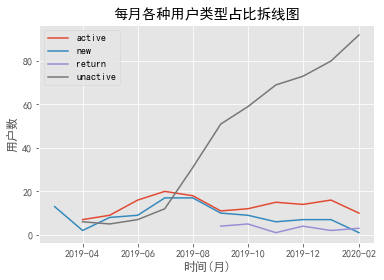

In [129]:
plt.plot(pivoted_status_counts.T)
plt.title('每月各种用户类型占比拆线图')
plt.legend(pivoted_status_counts.index)
plt.xlabel('时间(月)')
plt.ylabel('用户数')

黑色的不活跃用户占了较大的比重。红色的活跃用户较稳定，其与紫色的回流用户相加大抵是本月消费人数。

### 回流用户及活跃用户分析

(array([737150., 737180., 737211., 737241., 737272., 737303., 737333.,
        737364., 737394., 737425., 737456.]),
 <a list of 11 Text xticklabel objects>)

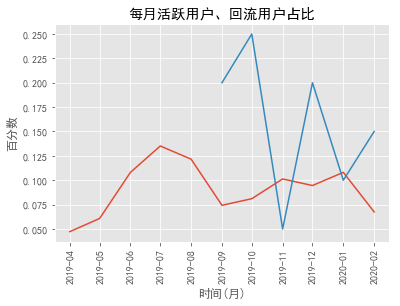

In [130]:
return_rate=pivoted_status_counts.apply(lambda x:x/x.sum(),axis=1)
plt.plot(return_rate.loc[['active','return'],].T)
plt.title('每月活跃用户、回流用户占比')
plt.xlabel('时间(月)')
plt.ylabel('百分数')
plt.xticks(rotation=90)

结合回流用户和活跃用户看，在后期的消费用户中，70%是回流用户，30%是活跃用户，整体质量还好。

# 用户质量分析

## 不同消费次数占比

In [155]:
df.groupby('user_id')['order_dt'].agg(['min','max']).reset_index().head()

,user_id,min,max
0,vs10000005,2019-03-29 00:00:00,2019-12-27 14:42:48
1,vs10000621,2019-03-14 00:00:00,2020-02-28 00:00:00
2,vs10000627,2019-07-22 15:27:38,2019-07-23 00:00:00
3,vs10000716,2019-07-05 00:00:00,2020-02-28 00:00:00
4,vs10000743,2019-03-15 00:00:00,2019-03-15 00:00:00


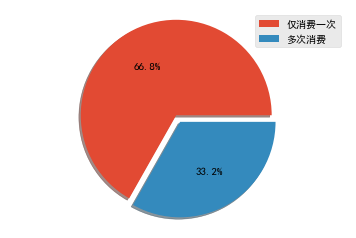

In [133]:
a = df.groupby('user_id')['order_dt'].agg(['min','max']).reset_index()
new_old = (a['min'] == a['max']).value_counts().values

plt.pie(x = new_old,
       autopct = '%.1f%%',
       shadow = True,
       explode = [0.08,0],
       textprops = {'fontsize' : 11})
plt.axis('equal') 
plt.legend(['仅消费一次','多次消费'])
plt.show()

有超过一半的用户仅消费了一次，这也说明了运营不利，留存效果不好。
复购率的定义：在某时间窗口内消费两次及以上的用户在总消费用户中占比。这里的时间窗口是月，如果一个用户在同一天下了两笔订单，这里也将他算作复购用户

## 复购率分析

In [134]:
#每个用户在每月的订单数
pivoted_df=df.pivot_table(index='user_id',columns='month',values='order_dt',aggfunc='count').fillna(0)#某些用户在某月没有消费过，用nan表示，这里用0填充

pivoted_df_transf=pivoted_df.applymap(lambda x: 1 if x>1 else np.nan if x==0 else 0)
pivoted_df_transf.head()

month,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00
user_id,,,,,,,,,,,,
vs10000005,1.00,nan,1.00,nan,nan,nan,nan,nan,nan,0.00,nan,nan
vs10000621,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
vs10000627,nan,nan,nan,nan,1.00,nan,nan,nan,nan,nan,nan,nan
vs10000716,nan,nan,nan,nan,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
vs10000743,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


Text(0.5,1,'复购率的变化')

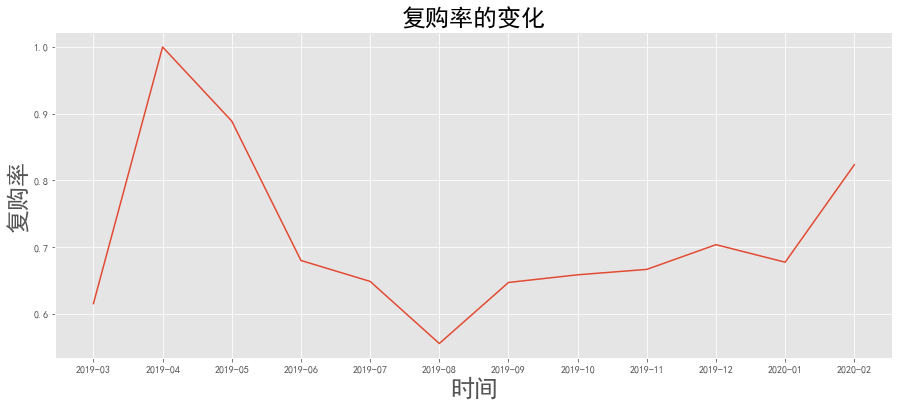

In [135]:
#count统计所有非空数据个数表示总消费用户数，sum计算非0数据的和表示消费两次以上的用户数
df_duplicate =pd.DataFrame(pivoted_df_transf.sum()/pivoted_df_transf.count()).reset_index()
df_duplicate.columns = ['Date', 'DuplicatedRate']
df_duplicate['Date'] = df_duplicate.Date.astype(str).apply(lambda x:x[:-3])

plt.figure(figsize = (15,6))
plt.plot(df_duplicate.Date, df_duplicate.DuplicatedRate)
plt.xlabel('时间', fontsize=24)
plt.ylabel('复购率',fontsize=24)
# plt.ylim(0,1)
plt.title('复购率的变化',fontsize=24)

## 回购率分析

In [136]:
pivoted_money=df.pivot_table(index='user_id',columns='month',values='order_amount',aggfunc='mean').fillna(0)

columns_month=df.month.sort_values().astype('str').unique()
pivoted_money.columns=columns_month
pivoted_money.head()

pivoted_purchase=pivoted_money.applymap(lambda x:1 if x>0 else 0)
pivoted_purchase.head()

,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01,2020-01-01,2020-02-01
user_id,,,,,,,,,,,,
vs10000005,1,0,1,0,0,0,0,0,0,1,0,0
vs10000621,1,1,1,1,1,1,1,1,1,1,1,1
vs10000627,0,0,0,0,0,0,0,0,0,0,0,0
vs10000716,0,0,0,0,1,1,1,1,1,1,1,1
vs10000743,1,0,0,0,0,0,0,0,0,0,0,0


In [139]:
def purchase_return(data):
    status = []
    for i in range(11):
        if data[i] == 1:
            if data[i+1] == 1:
                status.append(1)
            else:
                status.append(0)
        else:
            status.append(np.nan)
    status.append(np.nan)
    return pd.Series(status)
            
pivoted_purchase_return = pivoted_purchase.apply(purchase_return,axis=1)
pivoted_purchase_return.columns=columns_month
pivoted_purchase_return .head()

,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01,2020-01-01,2020-02-01
user_id,,,,,,,,,,,,
vs10000005,0.00,nan,0.00,nan,nan,nan,nan,nan,nan,0.00,nan,nan
vs10000621,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,nan
vs10000627,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
vs10000716,nan,nan,nan,nan,1.00,1.00,1.00,1.00,1.00,1.00,1.00,nan
vs10000743,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

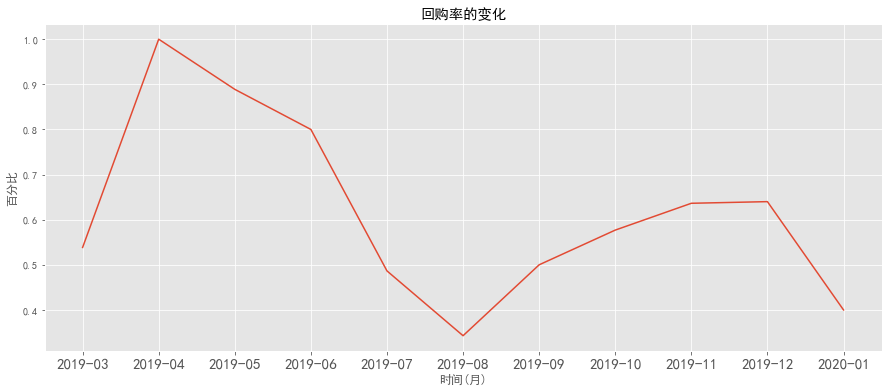

In [140]:
pivoted_purchase_return_rate=pivoted_purchase_return.sum()/pivoted_purchase_return.count()
plt.figure(figsize = (15,6))
plt.plot(df_duplicate.Date,pivoted_purchase_return_rate)
plt.title('回购率的变化')
plt.xlabel('时间(月)')
plt.ylabel('百分比')
plt.xticks(fontsize=15)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

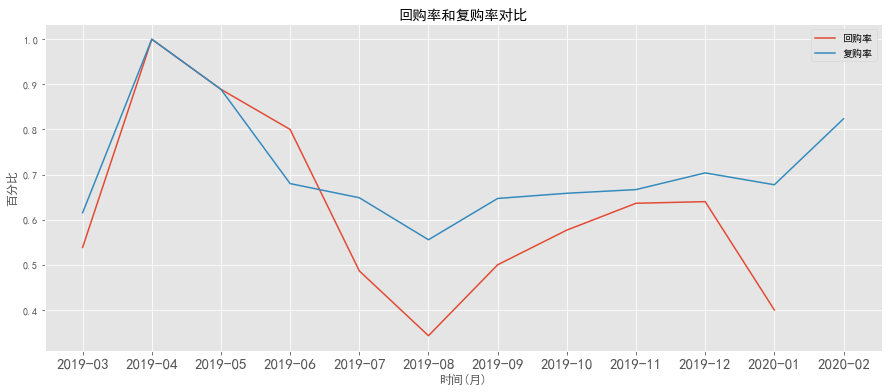

In [141]:
a,b=plt.subplots(figsize=(15,6))
b.plot(df_duplicate.Date,pivoted_purchase_return_rate)
b.plot(df_duplicate.Date,df_duplicate.DuplicatedRate)
legends=['回购率','复购率']
b.legend(legends)
plt.title('回购率和复购率对比')
plt.xlabel('时间(月)')
plt.ylabel('百分比')
plt.xticks(fontsize=15)

## 留存率分析

In [146]:
order_dt_min = df.groupby('user_id').order_dt.min()

In [147]:
user_purchase_retention=pd.merge(left=df,right=order_dt_min.reset_index(),how='inner',on='user_id',suffixes=('','_min'))
user_purchase_retention['date_diff']=(user_purchase_retention.order_dt-user_purchase_retention.order_dt_min)/np.timedelta64(1,'D')
bin=[0,30,60,90,120,150,180,365]
user_purchase_retention['date_diff_bin']=pd.cut(user_purchase_retention['date_diff'],bins=bin)
user_purchase_retention.head(10)

,user_id,order_dt,order_products,order_amount,month,order_dt_min,date_diff,date_diff_bin
0,vs30026748,2019-03-14 00:00:00,1,22,2019-03-01,2019-03-14,0.00,NaN
1,vs30026748,2019-03-15 00:00:00,1,20,2019-03-01,2019-03-14,1.00,"(0, 30]"
2,vs30026748,2019-03-19 00:00:00,2,1020,2019-03-01,2019-03-14,5.00,"(0, 30]"
3,vs30026748,2019-03-19 14:00:55,1,20,2019-03-01,2019-03-14,5.58,"(0, 30]"
4,vs30026748,2019-04-04 00:00:00,1,20,2019-04-01,2019-03-14,21.00,"(0, 30]"
5,vs30026748,2019-04-11 17:53:41,1,20,2019-04-01,2019-03-14,28.75,"(0, 30]"
6,vs30026748,2019-04-15 00:00:00,1,20,2019-04-01,2019-03-14,32.00,"(30, 60]"
7,vs30026748,2019-04-19 00:00:00,1,20,2019-04-01,2019-03-14,36.00,"(30, 60]"
8,vs30026748,2019-04-22 00:00:00,1,20,2019-04-01,2019-03-14,39.00,"(30, 60]"
9,vs30026748,2019-04-24 13:33:30,2,20,2019-04-01,2019-03-14,41.56,"(30, 60]"


In [148]:
pivoted_retention=user_purchase_retention.pivot_table(index='user_id',columns='date_diff_bin',values='order_amount',aggfunc=sum,dropna=False)
pivoted_retention.head()

date_diff_bin,"(0, 30]","(30, 60]","(60, 90]","(90, 120]","(120, 150]","(150, 180]","(180, 365]"
user_id,,,,,,,
vs10000005,17.00,59.00,nan,nan,nan,nan,80.00
vs10000621,240.00,280.00,440.00,400.00,200.00,40.00,1700.00
vs10000627,0.00,nan,nan,nan,nan,nan,nan
vs10000716,280.00,795.00,240.00,220.00,420.00,300.00,341.00
vs10000743,nan,nan,nan,nan,nan,nan,nan


In [149]:
pivoted_retention.mean()

date_diff_bin
(0, 30]       49.51
(30, 60]     148.62
(60, 90]     169.92
(90, 120]    310.32
(120, 150]   112.90
(150, 180]   112.93
(180, 365]   700.36
dtype: float64

c:\users\qiuyujia\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


Text(0,0.5,'百分数')

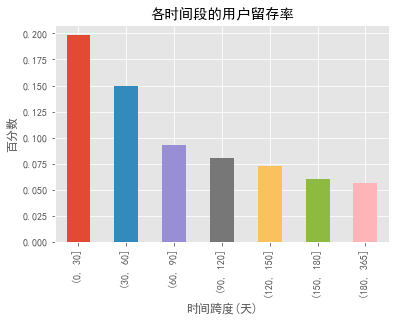

In [150]:
pivoted_retention.transf=pivoted_retention.fillna(0).applymap(lambda x:1 if x>0 else 0)
(pivoted_retention.transf.sum()/pivoted_retention.transf.count()).plot.bar()
plt.title('各时间段的用户留存率')
plt.xlabel('时间跨度(天)')
plt.ylabel('百分数')

第一个月的留存率约超过17.5%,第二个月下降至15%,之后几个月稳定在6%左右，说明后面几个月流失率较大 。

+ ## 用户贡献率

In [151]:
user_amount=df.groupby('user_id').order_amount.sum().sort_values().reset_index()
user_amount['amount_cumsum']=user_amount.order_amount.cumsum()
user_amount.tail()

,user_id,order_amount,amount_cumsum
242,vs10000716,2616,29735
243,vs10000775,2730,32465
244,vs30026748,3296,35761
245,vs30029475,4623,40384
246,vs10000621,5704,46088


Text(0,0.5,'百分数')

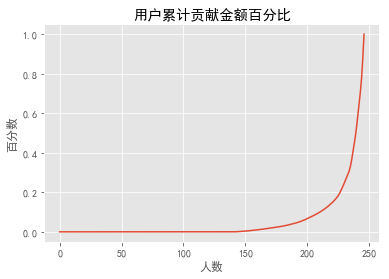

In [152]:
amount_total=user_amount.amount_cumsum.max()
user_amount['prop'] = user_amount.amount_cumsum.apply(lambda x:x/amount_total)
plt.plot(user_amount.prop )
plt.title('用户累计贡献金额百分比')
plt.xlabel('人数')
plt.ylabel('百分数')

此次数据集用户总共247人，可见其中47人(约占总人数的19%)贡献了超过80%的销售金额。